## Score: 45

## Comment: 

<font color=Red>
Q1.[5+10+10] Correct
<br><br>
Q2.[5] 编码字段定义为：direction angle- quality code-type code-speed rate-speed quality code
第4个字段为风速，第5个为风速质量控制码（speed quality code）。你的代码似乎没有按“风速质量码”筛风速，风速极端值大大增加。
<br><br>
Q3.[5+5+5] Correct
<br><br>
</font>

In [82]:
1.
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# 读取数据文件
Sig_Eqs = pd.read_csv('earthquakes-2025-10-29_21-16-28_+0800.tsv', sep='\t')
#查看是否成功
Sig_Eqs.head(5)

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [83]:
1.1
# 清理数据，提取有用列并去掉空值
Sig_Eqs_cleaned = Sig_Eqs[['Country', 'Deaths']].dropna()

# 按照国家进行分组并求和死亡人数
total_deaths_country = Sig_Eqs_cleaned.groupby('Country')['Deaths'].sum().reset_index()

# 按照死亡人数降序排列并选择前十个国家
top_10_countries = total_deaths_country.sort_values(by='Deaths', ascending=False).head(10)

# 输出结果
print(top_10_countries)

        Country     Deaths
20        CHINA  2139210.0
105      TURKEY  1199742.0
49         IRAN  1014453.0
53        ITALY   498219.0
97        SYRIA   419226.0
43        HAITI   323484.0
7    AZERBAIJAN   319251.0
55        JAPAN   242445.0
4       ARMENIA   191890.0
76     PAKISTAN   145083.0


Text(0, 0.5, 'Number of Earthquakes')

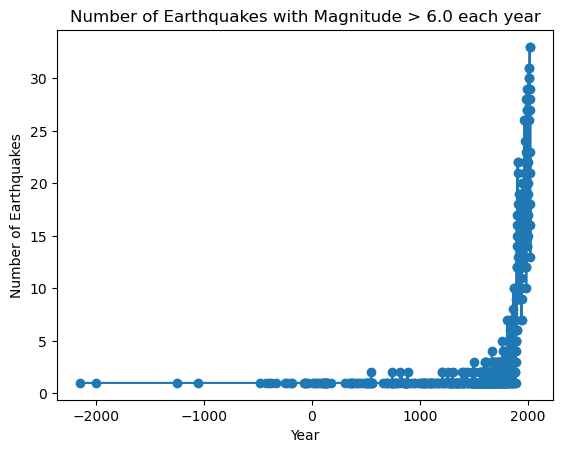

In [84]:
1.2
# 筛选出震级大于6.0的地震记录
Sig_Eqs_large_mag = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

# 按年份分组，并计算每年震级大于6.0的地震总数
earthquakes_by_year = Sig_Eqs_large_mag.groupby('Year').size().reset_index(name='Earthquake Count')

# 绘制图
plt.plot(earthquakes_by_year['Year'], earthquakes_by_year['Earthquake Count'], marker='o')
plt.title('Number of Earthquakes with Magnitude > 6.0 each year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')

#从结果可以看到近几百年地震记录非常多，但是并不能说明地震发生的多，随着技术的进步，尤其是地震仪器的普及和敏感度提高，过去未被记录的地震现在可能被检测到，导致较晚年份的地震数量增加。

In [96]:
1.3
# 定义函数 CountEq_LargestEq
def CountEq_LargestEq(country_data):
    # (1) 计算该国的地震总数
    total_earthquakes = len(country_data)
    
    # (2) 找到该国最大地震的年份和震级，忽略 NaN 值
    country_data_clean = country_data.dropna(subset=['Mag'])  # 去除 Mag 列中的 NaN 值
    if not country_data_clean.empty:  # 如果清理后的数据不为空
        largest_earthquake = country_data_clean.loc[country_data_clean['Mag'].idxmax()]
        largest_earthquake_year = largest_earthquake['Year']
        largest_earthquake_mag = largest_earthquake['Mag']
    else:
        largest_earthquake_year = None  # 如果该国没有有效地震数据，返回 None
        largest_earthquake_mag = None
    
    return total_earthquakes, largest_earthquake_year, largest_earthquake_mag

# 对每个国家应用该函数
results = Sig_Eqs.groupby('Country').apply(CountEq_LargestEq)

# 将结果转换为 DataFrame，并排序
results_df = pd.DataFrame(results.tolist(), columns=['Earthquakes', 'Year', 'Largest Mag'], index=results.index)

# 按地震总数降序排序
sorted_results = results_df.sort_values(by='Earthquakes', ascending=False)

print(sorted_results)

                                              Earthquakes    Year  Largest Mag
Country                                                                       
CHINA                                                 623  1668.0          8.5
JAPAN                                                 424  2011.0          9.1
INDONESIA                                             421  2004.0          9.1
IRAN                                                  388   856.0          7.9
TURKEY                                                358  1939.0          7.8
ITALY                                                 333  1915.0          7.5
GREECE                                                289   365.0          8.0
USA                                                   280  1964.0          9.2
PHILIPPINES                                           230  1897.0          8.7
MEXICO                                                214  1787.0          8.6
CHILE                                               

C:\Users\lig\AppData\Local\Temp\ipykernel_22588\694653914.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = Sig_Eqs.groupby('Country').apply(CountEq_LargestEq)


C:\Users\lig\AppData\Local\Temp\ipykernel_22588\3823552611.py:3: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2281305.csv')
C:\Users\lig\AppData\Local\Temp\ipykernel_22588\3823552611.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_wind_speed = valid_data.resample('M').mean()


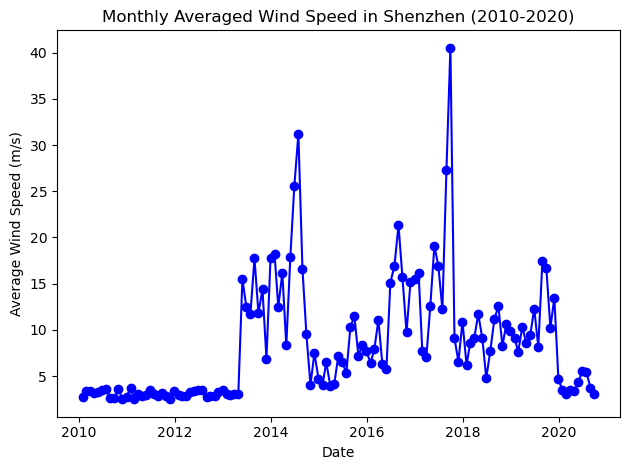

In [ ]:
2.
# 加载数据
df = pd.read_csv('2281305.csv')

# 提取风速信息
# 'WND' 列的风速数据是以"方向,质量代码,类型,风速,单位"格式存储
# 我们从中提取风速（即第四个值），并将单位转换为米/秒（除以10）
df['wind_speed'] = df['WND'].str.split(',').str[3].astype(float) / 10  # 提取风速并转换为浮动值（m/s）

# 数据清洗，去除风速数据缺失的行
valid_data = df[['DATE', 'wind_speed']].dropna(subset=['wind_speed'])

# 转换 'DATE' 列为日期格式，便于按时间聚合
valid_data['DATE'] = pd.to_datetime(valid_data['DATE'], errors='coerce')

# 将 'DATE' 列设置为数据的索引，便于按月进行重采样
valid_data.set_index('DATE', inplace=True)

# 按月重采样并计算每月平均风速
monthly_avg_wind_speed = valid_data.resample('M').mean()

# 绘制每月平均风速的趋势图
plt.plot(monthly_avg_wind_speed.index, monthly_avg_wind_speed['wind_speed'], marker='o', linestyle='-', color='b')  # 绘制曲线
plt.title('Monthly Averaged Wind Speed in Shenzhen (2010-2020)')  # 设置标题
plt.xlabel('Date')  # 设置x轴标签
plt.ylabel('Average Wind Speed (m/s)')  # 设置y轴标签
plt.tight_layout()  # 调整布局，使其不重叠
plt.show()  # 显示图表

#结论：2010-2020年的月平均风速整体上没有明显的长期上升或下降趋势，但存在一定的年际波动。2010-2013年左右风速较低，2013-2015年间风速较高，最大值接近35m/s，2016-2020年间风速出现过几次高峰，最大平均风速超过40m/s。

In [28]:
3.1
import pandas as pd
import matplotlib.pyplot as plt

# 加载Excel文件，该文件从https://data.casearth.cn/my/dataset/edit下载，题目为“2011-2021国际农产品价格数据”，文件名为“SDG基础数据.xlsx”
food_data = pd.read_excel('SDG基础数据.xlsx')
#查看是否成功
food_data.head(5)

,指标名称,(停)全国原粮收购价格指数:原粮(2008年=100),(停)全国原粮收购价格指数:小麦(2008年=100),(停)全国原粮收购价格指数:玉米(2008年=100),(停)全国原粮收购价格指数:稻谷(2008年=100),(停)全国原粮收购价格指数:早籼稻(2008年=100),(停)全国原粮收购价格指数:中晚籼稻(2008年=100),(停)全国原粮收购价格指数:粳稻(2008年=100),(停)全国原粮收购价格指数:大豆(2008年=100)
0,单位,2008年=100,2008年=100,2008年=100,2008年=100,2008年=100,2008年=100,2008年=100,2008年=100
1,来源,中储粮集团,中储粮集团,中储粮集团,中储粮集团,中储粮集团,中储粮集团,中储粮集团,中储粮集团
2,时间,原粮,小麦,玉米,稻谷,早籼稻,中晚籼稻,粳稻,大豆
3,2010-01-07 00:00:00,110.24,109.89,113,107.48,100.68,95.92,123.36,101.89
4,2010-01-14 00:00:00,110.01,111.54,112.97,108.52,100.51,96.19,125.82,96.51


In [43]:
# 删除前两行无关的数据
food_data_cleaned = food_data.drop(index=[0, 1])

# 设置正确的列名
food_data_cleaned.columns = food_data.iloc[0]
food_data_cleaned = food_data_cleaned.drop(index=2)

# 重设索引
food_data_cleaned = food_data_cleaned.reset_index(drop=True)

# 将“单位”列作为时间列，并删除“单位”列
food_data_cleaned['时间'] = food_data_cleaned['单位']
food_data_cleaned = food_data_cleaned.drop(columns=['单位'])

# 将“时间”列转换为日期格式
food_data_cleaned['时间'] = pd.to_datetime(food_data_cleaned['时间'])

#查看处理后的数据
food_data_cleaned.head(5)

,2008年=100,2008年=100,2008年=100,2008年=100,2008年=100,2008年=100,2008年=100,2008年=100,时间
0,110.24,109.89,113,107.48,100.68,95.92,123.36,101.89,2010-01-07
1,110.01,111.54,112.97,108.52,100.51,96.19,125.82,96.51,2010-01-14
2,111.76,111.81,114.36,108.9,102.01,96.41,125.86,100.23,2010-01-21
3,111.9,111.38,114.15,109.82,102.8,96.39,127.88,101.01,2010-01-28
4,112.07,111.51,114.1,110.27,103.71,96.22,128.78,99.43,2010-02-04


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site

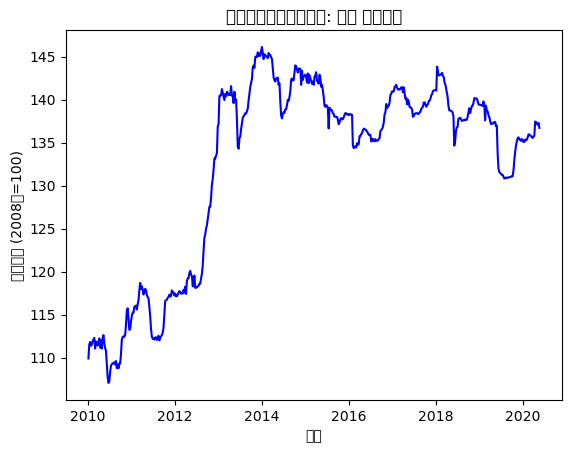

In [49]:
3.2
# 选择第二列作为“小麦”价格指数
food_data_cleaned['小麦'] = food_data_cleaned.iloc[:, 1]

# 绘制“小麦”价格指数的时间序列图
plt.plot(food_data_cleaned['时间'], food_data_cleaned['小麦'], label='小麦价格指数', color='b')
plt.xlabel('时间')
plt.ylabel('价格指数 (2008年=100)')
plt.title('全国原粮收购价格指数: 小麦 时间序列')
plt.show()



In [48]:
3.3 
# 进行统计分析
mean_value = food_data_cleaned['小麦'].mean()
median_value = food_data_cleaned['小麦'].median()
std_dev = food_data_cleaned['小麦'].std()
min_value = food_data_cleaned['小麦'].min()
max_value = food_data_cleaned['小麦'].max()

# 输出统计结果
print("均值:", mean_value)
print("中位数:", median_value)
print("标准差:", std_dev)
print("最小值:", min_value)
print("最大值:", max_value)

#结论：
#从2010到2020，小麦价格在2013年间增长较大，在2014至2020年间一直保持着上下波动，价格较为稳定。
#其中最小值107.05，最大值146.13，表明在期间内，小麦价格指数的波动幅度大约在39单位之间。
#整体来看，小麦价格指数的均值接近130，表示小麦的收购价格相对较为稳定，相对于2008年（基准100）来说，整体价格上升。

均值: 132.34377759961905
中位数: 137.45
标准差: 11.091580473775991
最小值: 107.05
最大值: 146.13
